# Credit Card Applications

Commercial banks receive a lot of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report. Manually analyzing these applications is error-prone and time-consuming. Luckily, this task can be automated using machine learning and pretty much every commercial bank does so nowadays. You will build a prediction system to approve/reject  credit card applications using machine learning techniques.

You'll use a dataset of credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. You can download the dataset as follows:

In [1]:
# !git clone https://github.com/cvrg-iyte/DATA602repo.git
# import pandas as pd
# data = pd.read_csv("./DATA602repo/crx.data", header=None)

This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values which you will need to handle.



- The last attribute is the class attribute, i.e the target value in this 2-class classification problem (positive or negative).
- First, start by analyzing the dataset for numerical and non-numerical values, if it contains values between different ranges and if it has any missing values.
- Then, preprocess the dataset to ensure that we are only feeding numerical values to the machine learning model for predictions.
- Finally, apply machine learning models that can predict if an individual's application for a credit card will be accepted or not. You are supposed to try different classification methods and apply best practices we have seen in the lectures such as grid search, cross validation, regularization etc.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Setting column names
columns = ["A" + str(i) for i in range(1, 16)]
columns.append('Target')

df = pd.read_csv('https://raw.githubusercontent.com/cvrg-iyte/DATA602repo/main/crx.data',sep=',',names = columns)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
df.describe()

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  Target  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [6]:
# Replacing unknown character '?' in all columns with NaN
df.replace({'?': np.nan}, inplace=True)
df.isna().sum()

A1        12
A2        12
A3         0
A4         6
A5         6
A6         9
A7         9
A8         0
A9         0
A10        0
A11        0
A12        0
A13        0
A14       13
A15        0
Target     0
dtype: int64

In [7]:
# Convert 'A2' column to numeric data type
df['A2'] = pd.to_numeric(df['A2'], errors='coerce')

# Fill null values with the mean of the 'A2' column since it has continuous values
df['A2'].fillna(round(df['A2'].mean(),2), inplace=True)

# Dropping all the null values in other columns
df.dropna(inplace=True)

# Convert 'A14' column to numeric data type
df['A14'] = df['A14'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 664 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      664 non-null    object 
 1   A2      664 non-null    float64
 2   A3      664 non-null    float64
 3   A4      664 non-null    object 
 4   A5      664 non-null    object 
 5   A6      664 non-null    object 
 6   A7      664 non-null    object 
 7   A8      664 non-null    float64
 8   A9      664 non-null    object 
 9   A10     664 non-null    object 
 10  A11     664 non-null    int64  
 11  A12     664 non-null    object 
 12  A13     664 non-null    object 
 13  A14     664 non-null    int64  
 14  A15     664 non-null    int64  
 15  Target  664 non-null    object 
dtypes: float64(3), int64(3), object(10)
memory usage: 88.2+ KB


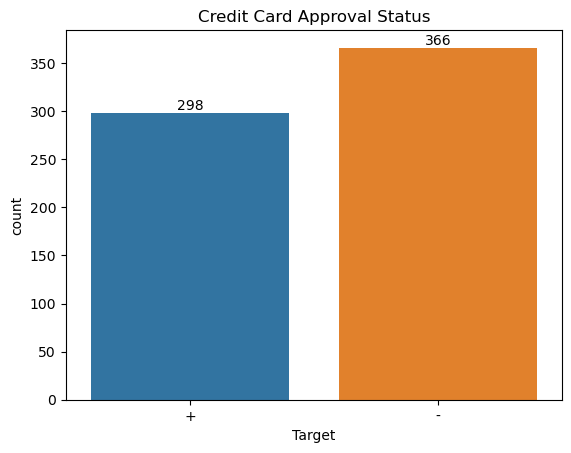

In [8]:
# Create the count plot
ax = sns.countplot(x='Target', data=df)

# Loop through the bars to add count values at the top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+3, height, ha="center")
    
# Set the plot title
plt.title('Credit Card Approval Status')

# Display the plot
plt.show()

In [9]:
# Convert categorical columns to numericals using LabelEncoder
from sklearn.preprocessing import LabelEncoder

cols_to_convert = ['A1','A4','A5','A6','A7','A9','A10','A12','A13','Target']
le = LabelEncoder()
for col in cols_to_convert:
    df[col] = le.fit_transform(df[col])
    print(df[col].unique())
    print(le.classes_,'\n')

[1 0]
['a' 'b'] 

[1 2 0]
['l' 'u' 'y'] 

[0 2 1]
['g' 'gg' 'p'] 

[12 10  9 11  2  8  1  3 13  6  4  0  5  7]
['aa' 'c' 'cc' 'd' 'e' 'ff' 'i' 'j' 'k' 'm' 'q' 'r' 'w' 'x'] 

[7 3 0 2 4 8 6 1 5]
['bb' 'dd' 'ff' 'h' 'j' 'n' 'o' 'v' 'z'] 

[1 0]
['f' 't'] 

[1 0]
['f' 't'] 

[0 1]
['f' 't'] 

[0 2 1]
['g' 'p' 's'] 

[0 1]
['+' '-'] 



In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 664 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      664 non-null    int32  
 1   A2      664 non-null    float64
 2   A3      664 non-null    float64
 3   A4      664 non-null    int32  
 4   A5      664 non-null    int32  
 5   A6      664 non-null    int32  
 6   A7      664 non-null    int32  
 7   A8      664 non-null    float64
 8   A9      664 non-null    int32  
 9   A10     664 non-null    int32  
 10  A11     664 non-null    int64  
 11  A12     664 non-null    int32  
 12  A13     664 non-null    int32  
 13  A14     664 non-null    int64  
 14  A15     664 non-null    int64  
 15  Target  664 non-null    int32  
dtypes: float64(3), int32(10), int64(3)
memory usage: 62.2 KB


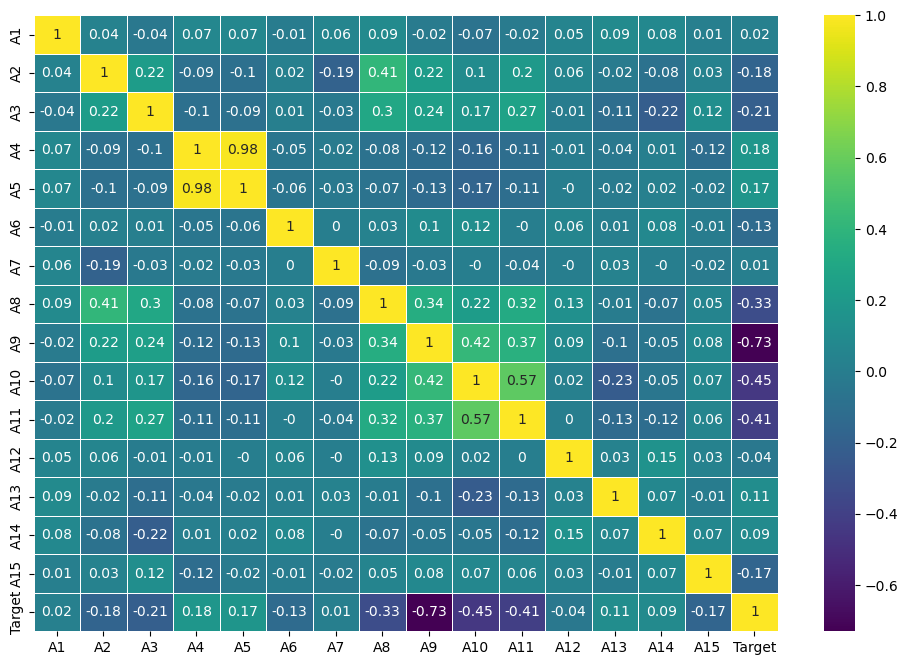

In [11]:
figure = plt.figure(figsize=(12,8))
sns.heatmap(round(df.corr(),2),annot=True,linewidth=0.5,cmap='viridis')
plt.show()

In [12]:
X = df.drop('Target',axis=1)
y = df['Target']

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=df.drop(columns=['Target']).columns)

# Using train_test_split to split the data
x_train, x_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2,random_state=42)

In [13]:
#Logistic Regression Classifier
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)
lr_score = lr.score(x_test, y_test)
print(f'Accuracy with Logistic Regression: {lr_score}')

#Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(x_train, y_train)
dtc_score = dtc.score(x_test, y_test)
print(f'Accuracy with Decision Tree: {dtc_score}')

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
rf_score = rf.score(x_test, y_test)
print(f'Accuracy with Random Forest: {rf_score}')

# Support Vector Machine classifier
svc = SVC(random_state=42)
svc.fit(x_train, y_train)
svc_score = svc.score(x_test, y_test)
print(f'Accuracy with SVM: {svc_score}')

# KNN classifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_score = knn.score(x_test, y_test)
print(f'Accuracy with SVM: {knn_score}')

Accuracy with Logistic Regression: 0.8571428571428571
Accuracy with Decision Tree: 0.8345864661654135
Accuracy with Random Forest: 0.8947368421052632
Accuracy with SVM: 0.8646616541353384
Accuracy with SVM: 0.849624060150376


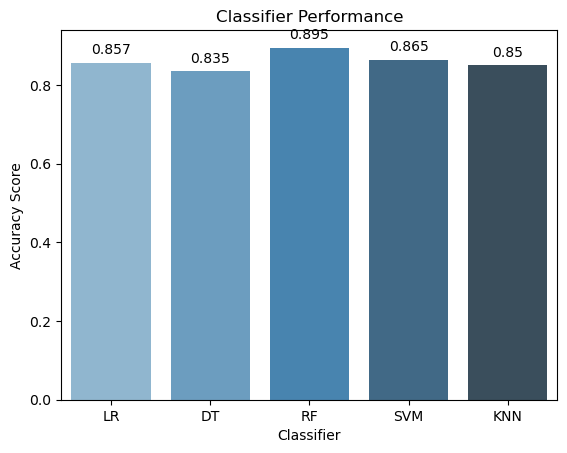

In [14]:
# Create a DataFrame
df1 = pd.DataFrame({
    'Classifier': ['LR', 'DT', 'RF', 'SVM', 'KNN'],
    'Accuracy': [lr_score, dtc_score, rf_score, svc_score, knn_score]
})

df1['Model'] = 'Base'

# Create a barplot with colors for each bar
ax = sns.barplot(x='Classifier', y='Accuracy', data=df1, palette="Blues_d")

# Add annotation for each bar
for i, score in enumerate(df1['Accuracy']):
    ax.text(i, score+0.05, str(round(score, 3)), ha='center', va='top', fontsize=10)

# Add labels and title
ax.set_ylabel("Accuracy Score")
ax.set_xlabel("Classifier")
ax.set_title("Classifier Performance")

plt.show()

### Initially using all the features to check model performance

In [15]:
def gridsearch(clf, paramgrid, x_train, x_test, y_train, y_test ):
    # Initialize a GridSearchCV object with the logistic regression model and the parameter grid
    grid_search = GridSearchCV(estimator=clf, param_grid=paramgrid, cv=5)

    # Fit the GridSearchCV object to the data and select the best hyperparameters
    grid_search.fit(x_train, y_train)

    # Evaluate the LR classifier on the testing set
    best = grid_search.best_estimator_
    pred = best.predict(x_test)
    accuracy = accuracy_score(y_test,pred)

    # Print the best hyperparameters and the corresponding mean cross-validation score
    print("Best hyperparameters: ", grid_search.best_params_)
    print("Best accuracy with training data: ", grid_search.best_score_)
    print("Accuracy with test data: ", accuracy)
    
    # Print the classification report
    print("Classification Report:\n", classification_report(y_test, pred))
    
    return accuracy

In [16]:
# Logistic Regression

# Define the parameter grid to search over
param_grid_lr = {
    "C": [0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga","lbfgs"]
}

# Create a Logistic Regression classifier object
lr = LogisticRegression(random_state=42)

lr_score_tuned = gridsearch(lr,param_grid_lr,x_train,x_test,y_train,y_test)

Best hyperparameters:  {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Best accuracy with training data:  0.8644507141597602
Accuracy with test data:  0.8571428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.84        52
           1       0.96      0.80      0.87        81

    accuracy                           0.86       133
   macro avg       0.85      0.87      0.86       133
weighted avg       0.88      0.86      0.86       133



In [17]:
# Decison Tree classifier

# Define the parameter grid to search over
param_grid_tree = {'criterion': ['gini', 'entropy'], 
              'max_depth': [3, 5, 7, 9, 11], 
              'min_samples_split': [2, 5, 10, 15],
              'min_samples_leaf': [1, 2, 5, 10, 15]}

# Create a decision tree classifier object
dtc = DecisionTreeClassifier(random_state=42)

dtc_score_tuned = gridsearch(dtc,param_grid_tree,x_train,x_test,y_train,y_test)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best accuracy with training data:  0.8663198730382649
Accuracy with test data:  0.8721804511278195
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83        52
           1       0.88      0.91      0.90        81

    accuracy                           0.87       133
   macro avg       0.87      0.86      0.86       133
weighted avg       0.87      0.87      0.87       133



In [18]:
# Random Forest classifier

# Define the parameter grid to search over
param_grid_rf = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 25, 75, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 8, 10],
    'min_samples_leaf': [1, 2, 4, 7]
}

# Create a random forest classifier object
rfc = RandomForestClassifier(random_state=42)

rf_score_tuned = gridsearch(rfc,param_grid_rf,x_train,x_test,y_train,y_test)

Best hyperparameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 75}
Best accuracy with training data:  0.8851172632692647
Accuracy with test data:  0.9022556390977443
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88        52
           1       0.94      0.90      0.92        81

    accuracy                           0.90       133
   macro avg       0.90      0.90      0.90       133
weighted avg       0.90      0.90      0.90       133



In [19]:
# SVM classifier

# Define the parameter grid to search over
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Create a random forest classifier object
svc = SVC(random_state=42)

svc_score_tuned = gridsearch(svc,param_grid_svc,x_train,x_test,y_train,y_test)

Best hyperparameters:  {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy with training data:  0.8701110915182507
Accuracy with test data:  0.8721804511278195
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85        52
           1       0.94      0.84      0.89        81

    accuracy                           0.87       133
   macro avg       0.87      0.88      0.87       133
weighted avg       0.88      0.87      0.87       133



In [20]:
#KNN classifier

# Define the grid of hyperparameters to search over
param_grid_knn = {'n_neighbors': [1, 3, 5, 7, 9], 
              'weights': ['uniform', 'distance'], 
              'p': [1, 2, 3]}

# Define the KNN classifier
knn = KNeighborsClassifier()

knn_score_tuned = gridsearch(knn,param_grid_knn,x_train,x_test,y_train,y_test)

Best hyperparameters:  {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best accuracy with training data:  0.8682066654910952
Accuracy with test data:  0.8721804511278195
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84        52
           1       0.90      0.89      0.89        81

    accuracy                           0.87       133
   macro avg       0.87      0.87      0.87       133
weighted avg       0.87      0.87      0.87       133



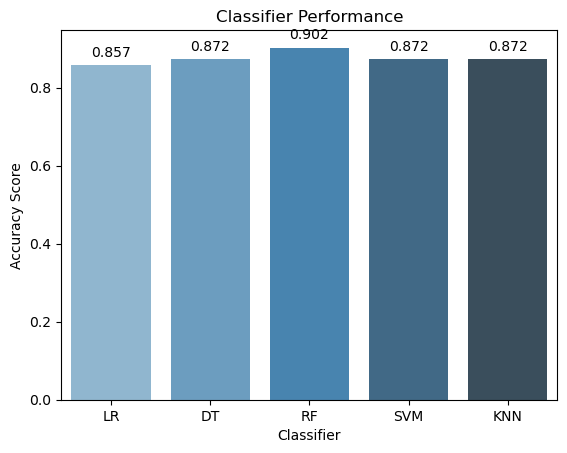

In [21]:
# Create a DataFrame
df2 = pd.DataFrame({
    'Classifier': ['LR', 'DT', 'RF', 'SVM', 'KNN'],
    'Accuracy': [lr_score_tuned, dtc_score_tuned, rf_score_tuned, svc_score_tuned, knn_score_tuned]
})

df2['Model'] = 'param_tuned'

# Create a barplot with colors for each bar
ax = sns.barplot(x='Classifier', y='Accuracy', data=df2, palette="Blues_d")

# Add annotation for each bar
for i, score in enumerate(df2['Accuracy']):
    ax.text(i, score+0.05, str(round(score, 3)), ha='center', va='top', fontsize=10)

# Add labels and title
ax.set_ylabel("Accuracy Score")
ax.set_xlabel("Classifier")
ax.set_title("Classifier Performance")

plt.show()

In [22]:
# # Performing Bagging on the classification models using best parameters from hyperparameter tuning

# # Creating classifier objects
# lr = LogisticRegression(C=1,penalty='l2',solver='saga')
# dtc = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=15, min_samples_split=2)
# # rf = RandomForestClassifier(criterion='entropy', max_depth=None, min_samples_leaf=2, min_samples_split=8, n_estimators=70)
# svc = SVC(C=0.1, degree=2, gamma='scale', kernel= 'linear')
# knn = KNeighborsClassifier(n_neighbors=7, p=2, weights='uniform')

# model_dict = {'LR' : lr, 'DT' : dtc, 'SVM' : svc, 'KNN' : knn}

# accuracy_dict_bag = {}
# for key,value in model_dict.items():
    
#     # Define the bagging classifier
#     bagging = BaggingClassifier(base_estimator=value, n_estimators=50, random_state=42)
    
#     # Train the bagging classifiers
#     bagging.fit(x_train, y_train)

#     # Evaluate the bagging classifiers on the testing set
#     y_pred = bagging.predict(x_test)

#     acc = accuracy_score(y_test, y_pred)

#     print(f"Bagging with {key} accuracy:", acc)
    
#     accuracy_dict_bag[key] = acc

Performing ensembling on models using bagging to check performance

In [23]:
# Creating classifier objects
lr = LogisticRegression(random_state = 42)
dtc = DecisionTreeClassifier(random_state = 42)
# rf = RandomForestClassifier(criterion='entropy', max_depth=None, min_samples_leaf=2, min_samples_split=8, n_estimators=70)
svc = SVC(random_state = 42)
knn = KNeighborsClassifier()

model_dict = {'LR' : lr, 'DT' : dtc, 'SVM' : svc, 'KNN' : knn}

accuracy_dict_bag = {}
for key,value in model_dict.items():
    
    # Define the bagging classifier
    bagging = BaggingClassifier(base_estimator=value, n_estimators=50, random_state=42)
    
    # Train the bagging classifiers
    bagging.fit(x_train, y_train)

    # Evaluate the bagging classifiers on the testing set
    y_pred = bagging.predict(x_test)

    acc = accuracy_score(y_test, y_pred)

    print(f"Bagging with {key} accuracy:", acc)
    
    accuracy_dict_bag[key] = acc

Bagging with LR accuracy: 0.8571428571428571
Bagging with DT accuracy: 0.8872180451127819
Bagging with SVM accuracy: 0.8721804511278195
Bagging with KNN accuracy: 0.8345864661654135


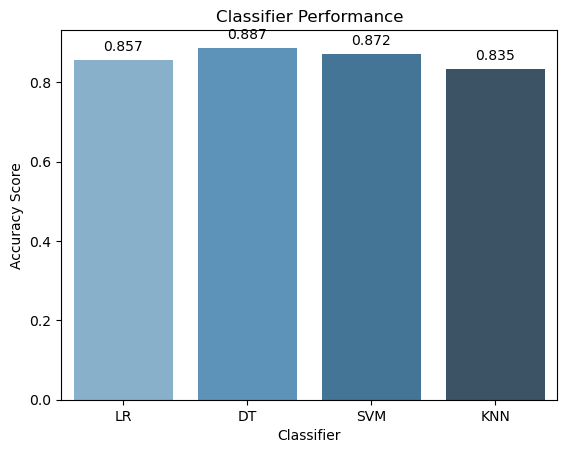

In [24]:
# Create a DataFrame

df3 = pd.DataFrame(accuracy_dict_bag.items(), columns=['Classifier', 'Accuracy'])

df3['Model'] = 'bagging'

# Create a barplot with colors for each bar
ax = sns.barplot(x='Classifier', y='Accuracy', data=df3, palette="Blues_d")

# Add annotation for each bar
for i, score in enumerate(df3['Accuracy']):
    ax.text(i, score+0.05, str(round(score, 3)), ha='center', va='top', fontsize=10)

# Add labels and title
ax.set_ylabel("Accuracy Score")
ax.set_xlabel("Classifier")
ax.set_title("Classifier Performance")

plt.show()

In [25]:
#Feature selection with wrapper method(Recursive Feature Elimination)

clf = DecisionTreeClassifier(random_state=42)
clf2 = LogisticRegression(random_state=42)

# Initialize empty lists to store the number of selected features and the corresponding model scores
n_features_list = []
score_list = []
selected_features_list = []

# Loop through the range of 2 to 15 and select the best subset of features
for n in range(2, 16):
    # Initialize an RFE object with the logistic regression model and the number of features to select
    rfe = RFE(estimator=clf, n_features_to_select=n, step=1)

    # Fit the RFE object to the data and select the best subset of features
    rfe.fit(X, y)

    # Print the selected features
    selected_features = X.columns[rfe.support_]
    print(f"Selected Features (n={n}): {list(selected_features)}")
    selected_features_list.append(list(selected_features))

    
    # Get the model score for the selected features
    X_selected = X[selected_features]
    score = cross_val_score(clf2, X_selected, y, cv=5).mean()
    print(f"Model Score: {score:.3f}\n")

    # Append the number of selected features and the corresponding model score to the lists
    n_features_list.append(n)
    score_list.append(score)

Selected Features (n=2): ['A2', 'A9']
Model Score: 0.860

Selected Features (n=3): ['A2', 'A9', 'A14']
Model Score: 0.859

Selected Features (n=4): ['A2', 'A3', 'A9', 'A14']
Model Score: 0.859

Selected Features (n=5): ['A2', 'A3', 'A9', 'A14', 'A15']
Model Score: 0.860

Selected Features (n=6): ['A2', 'A3', 'A9', 'A11', 'A14', 'A15']
Model Score: 0.862

Selected Features (n=7): ['A2', 'A3', 'A8', 'A9', 'A11', 'A14', 'A15']
Model Score: 0.853

Selected Features (n=8): ['A2', 'A3', 'A6', 'A8', 'A9', 'A11', 'A14', 'A15']
Model Score: 0.846

Selected Features (n=9): ['A2', 'A3', 'A4', 'A6', 'A8', 'A9', 'A11', 'A14', 'A15']
Model Score: 0.854

Selected Features (n=10): ['A2', 'A3', 'A4', 'A6', 'A7', 'A8', 'A9', 'A11', 'A14', 'A15']
Model Score: 0.856

Selected Features (n=11): ['A2', 'A3', 'A4', 'A6', 'A7', 'A8', 'A9', 'A11', 'A12', 'A14', 'A15']
Model Score: 0.851

Selected Features (n=12): ['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A11', 'A12', 'A14', 'A15']
Model Score: 0.853

Se

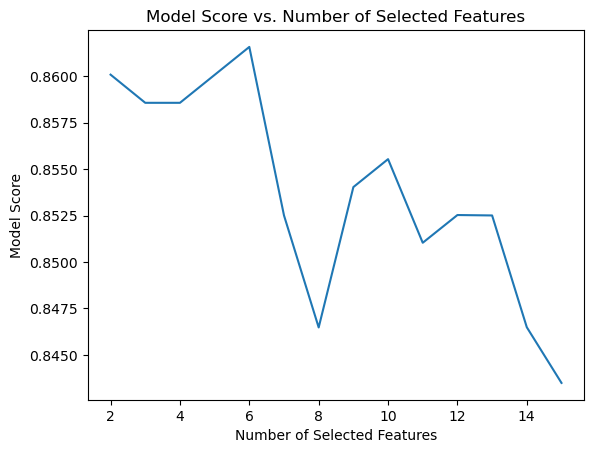

In [26]:
# Plot a line graph of the model scores as a function of the number of selected features
plt.plot(n_features_list, score_list)
plt.xlabel("Number of Selected Features")
plt.ylabel("Model Score")
plt.title("Model Score vs. Number of Selected Features")
plt.show()

### Using only selected features from wrapper method to check performance

In [27]:
# Create a dictionary
d = {"n": n_features_list, "selected_features": selected_features_list, "score": score_list}

# Convert the dictionary into a pandas DataFrame
feature_scores = pd.DataFrame.from_dict(d)

# Find the row(s) with maximum score
max_score_rows = feature_scores.loc[feature_scores['score'] == feature_scores['score'].max()]

# Find the index of the row with the minimum n
min_n_idx = max_score_rows['n'].idxmin()

# Get the selected features for the row with the minimum n
selected_features = max_score_rows.loc[min_n_idx, 'selected_features']

print(f"Selected features list with max score and min features: {selected_features}")

Selected features list with max score and min features: ['A2', 'A3', 'A9', 'A11', 'A14', 'A15']


In [28]:
X_rfe = X[selected_features]   #Selecting only feature list with best score
x_train2, x_test2, y_train, y_test = train_test_split(X_rfe, y ,test_size = 0.2,random_state=42)

In [29]:
# Logistic Regression

# Define the parameter grid to search over
param_grid_lr = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"]
}

# Create a Logistic Regression classifier object
lr = LogisticRegression(random_state=42)

lr_score_selected = gridsearch(lr,param_grid_lr,x_train2,x_test2,y_train,y_test)

Best hyperparameters:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best accuracy with training data:  0.8663375066125905
Accuracy with test data:  0.849624060150376
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.94      0.83        52
           1       0.96      0.79      0.86        81

    accuracy                           0.85       133
   macro avg       0.85      0.87      0.85       133
weighted avg       0.87      0.85      0.85       133



In [30]:
# Decison Tree classifier

# Define the parameter grid to search over
param_grid_tree = {'criterion': ['gini', 'entropy'], 
              'max_depth': [3, 5, 7, 9, 11], 
              'min_samples_split': [2, 5, 10, 15],
              'min_samples_leaf': [1, 2, 5, 10, 15]}

# Create a decision tree classifier object
dtc = DecisionTreeClassifier(random_state=42)

dtc_score_selected = gridsearch(dtc,param_grid_tree,x_train2,x_test2,y_train,y_test)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 2}
Best accuracy with training data:  0.8776053606065949
Accuracy with test data:  0.8571428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        52
           1       0.92      0.84      0.88        81

    accuracy                           0.86       133
   macro avg       0.85      0.86      0.85       133
weighted avg       0.86      0.86      0.86       133



In [31]:
# Random Forest classifier

# Define the parameter grid to search over
param_grid_rf = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier object
rfc = RandomForestClassifier(random_state=42)

rf_score_selected = gridsearch(rfc,param_grid_rf,x_train2,x_test2,y_train,y_test)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10}
Best accuracy with training data:  0.8813613119379298
Accuracy with test data:  0.8796992481203008
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        52
           1       0.93      0.86      0.90        81

    accuracy                           0.88       133
   macro avg       0.87      0.88      0.88       133
weighted avg       0.89      0.88      0.88       133



In [32]:
# SVM classifier

# Define the parameter grid to search over
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Create a random forest classifier object
svc = SVC(random_state=42)

svc_score_selected = gridsearch(svc,param_grid_svc,x_train2,x_test2,y_train,y_test)

Best hyperparameters:  {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best accuracy with training data:  0.8625639217069301
Accuracy with test data:  0.849624060150376
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.94      0.83        52
           1       0.96      0.79      0.86        81

    accuracy                           0.85       133
   macro avg       0.85      0.87      0.85       133
weighted avg       0.87      0.85      0.85       133



In [33]:
#KNN classifier

# Define the grid of hyperparameters to search over
param_grid_knn = {'n_neighbors': [1, 3, 5, 7, 9], 
              'weights': ['uniform', 'distance'], 
              'p': [1, 2, 3]}

# Define the KNN classifier
knn = KNeighborsClassifier()

knn_score_selected = gridsearch(knn,param_grid_knn,x_train2,x_test2,y_train,y_test)

Best hyperparameters:  {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
Best accuracy with training data:  0.8644330805854347
Accuracy with test data:  0.8571428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        52
           1       0.92      0.84      0.88        81

    accuracy                           0.86       133
   macro avg       0.85      0.86      0.85       133
weighted avg       0.86      0.86      0.86       133



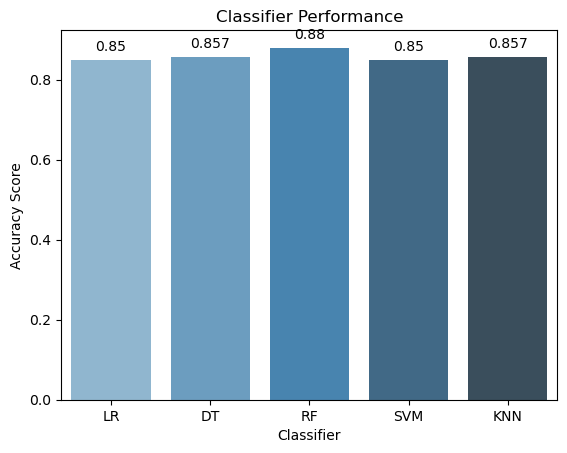

In [34]:
# Create a DataFrame
df4 = pd.DataFrame({
    'Classifier': ['LR', 'DT', 'RF', 'SVM', 'KNN'],
    'Accuracy': [lr_score_selected, dtc_score_selected, rf_score_selected, svc_score_selected, knn_score_selected]
})

df4['Model'] = 'featured'

# Create a barplot with colors for each bar
ax = sns.barplot(x='Classifier', y='Accuracy', data=df4, palette="Blues_d")

# Add annotation for each bar
for i, score in enumerate(df4['Accuracy']):
    ax.text(i, score+0.05, str(round(score, 3)), ha='center', va='top', fontsize=10)

# Add labels and title
ax.set_ylabel("Accuracy Score")
ax.set_xlabel("Classifier")
ax.set_title("Classifier Performance")

plt.show()

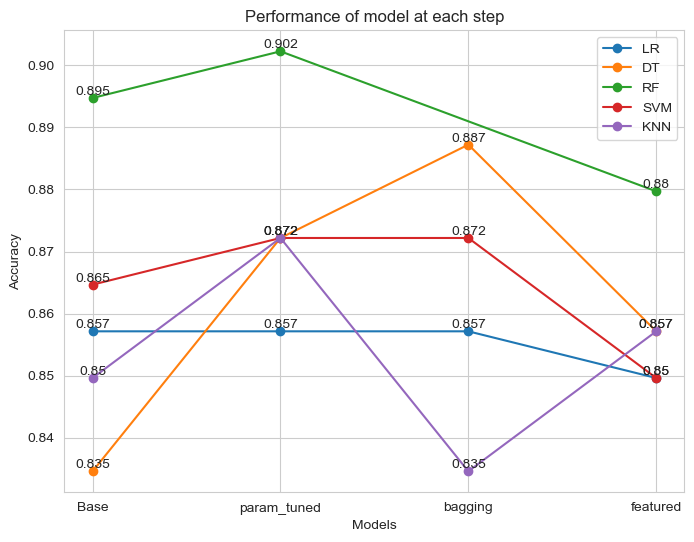

In [35]:
# concatenate the DataFrames of scores
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# set up the plot
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# loop through each classifier and plot the line with dots
for i in df['Classifier'].unique():
    x = df[df['Classifier'] == i]['Model']
    y = df[df['Classifier'] == i]['Accuracy']
    plt.plot(x, y, marker='o', label=i)
    
    # loop through each point and add text annotation with value
    for j, (xval, yval) in enumerate(zip(x, y)):
        plt.text(xval, yval, f"{round(yval, 3)}", ha='center', va='bottom', fontsize=10)


# set labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Performance of model at each step')
plt.legend()

# show the plot
plt.show()

In [37]:
df

,Classifier,Accuracy,Model
0,LR,0.857143,Base
1,DT,0.834586,Base
2,RF,0.894737,Base
3,SVM,0.864662,Base
4,KNN,0.849624,Base
5,LR,0.857143,param_tuned
6,DT,0.872180,param_tuned
7,RF,0.902256,param_tuned
8,SVM,0.872180,param_tuned
9,KNN,0.872180,param_tuned
